# **TITANIC PREDICTION SERVIVAL PREDICTION**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING TITANIC DATA**

In [60]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df.shape

(891, 15)

In [62]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Counting class**

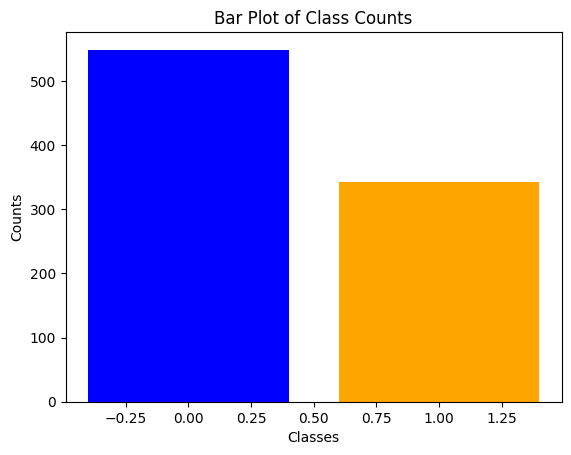

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

class_counts = df['survived'].value_counts()

plt.bar(class_counts.index, class_counts.values,color=['blue', 'orange'])

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Bar Plot of Class Counts')

plt.show()

**Checking the categorical data**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


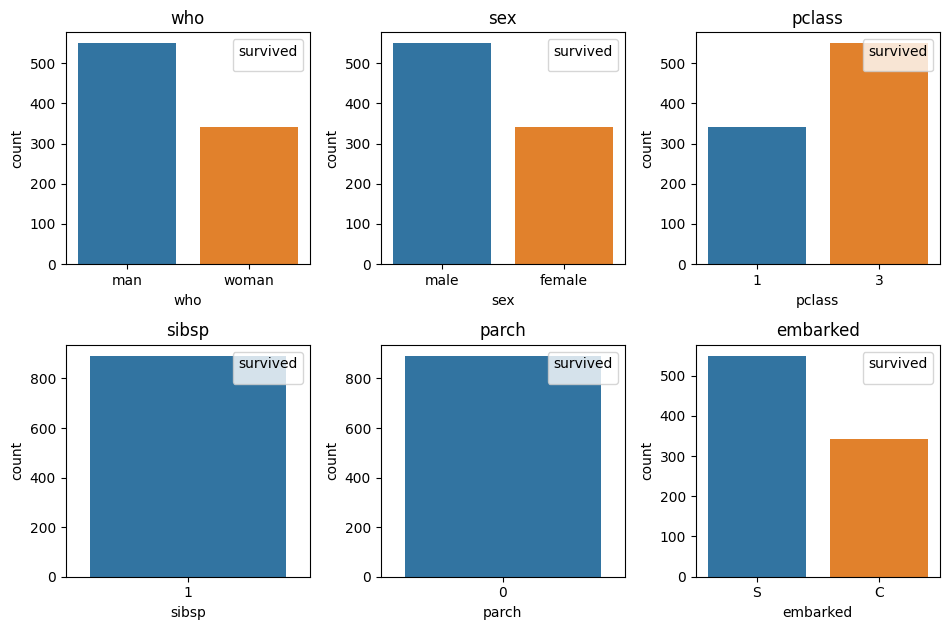

In [64]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):

        i = r*n_cols+ c
        ax = axs[r][c]
        sns.countplot(df[cols[i]], x=df["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right')

plt.tight_layout()

In [65]:
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [66]:
df.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Analysis based on gender**

<Axes: xlabel='sex'>

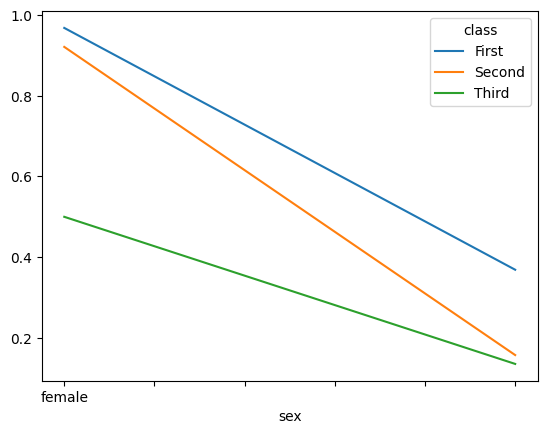

In [67]:
df.pivot_table('survived', index='sex', columns='class').plot()

<Axes: xlabel='class', ylabel='survived'>

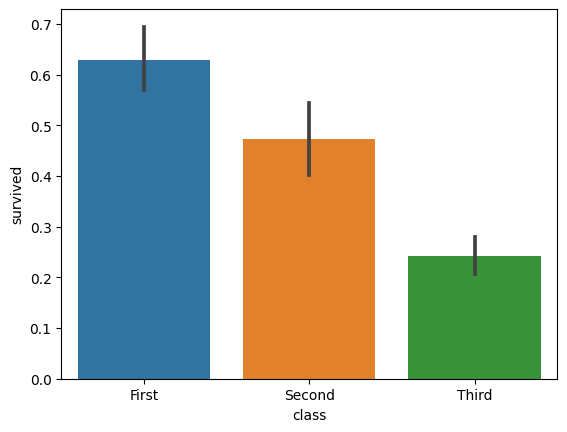

In [68]:
sns.barplot(x='class', y='survived', data=df)

In [69]:
import pandas as pd
age = pd.cut(df['age'], [0, 18, 80])
df.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

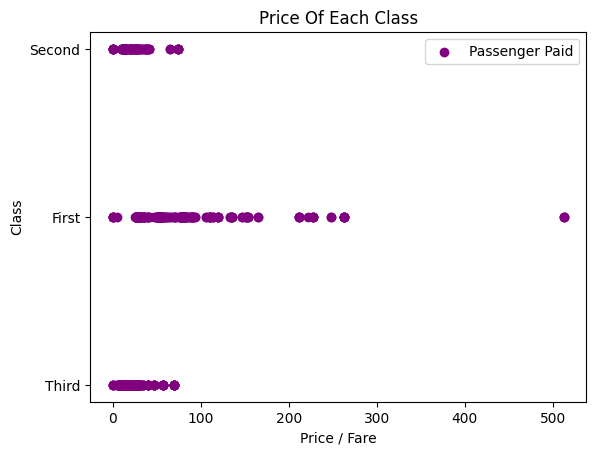

In [70]:
plt.scatter(df['fare'], df['class'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

**Checking Null values**

In [71]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
for val in df:
   print(df[val].value_counts())
   print()

survived
0    549
1    342
Name: count, dtype: int64

pclass
3    491
1    216
2    184
Name: count, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

class
Third     491
First     216
Second    184
Name: count, dtype: int64

who
man      537
woman    271
child     83
Name: count, dtype: int64

adult_male
True     537
False    354
Name: count, dt

**Removing null value**

In [73]:
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

df = df.dropna(subset =['embarked', 'age'])

In [78]:
df.shape

(712, 8)

In [79]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [80]:
print(df['sex'].unique())
print(df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


**Converting Categorical into numerical**

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.iloc[:,2]= labelencoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,7]= labelencoder.fit_transform(df.iloc[:,7].values)

print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


In [44]:
X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

**Spliting data for training and testing**

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Selecting the best model based on performance**

In [47]:
def models(X_train,Y_train):

  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest


**Training all the model**

In [84]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


**Metrics and Accuracy**

In [86]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print("_______________________________________________")

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182 !"
_______________________________________________
[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552 !"
_______________________________________________
[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"
_______________________________________________
[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"
_______________________________________________
[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203 !"
_______________________________________________
[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203 !"
_______________________________________________
[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392 !"
_______________________________________________


**Selecting Random Forest**

In [51]:
forest = model[6]
importances = pd.DataFrame({'feature':df.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances


,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<Axes: xlabel='feature'>

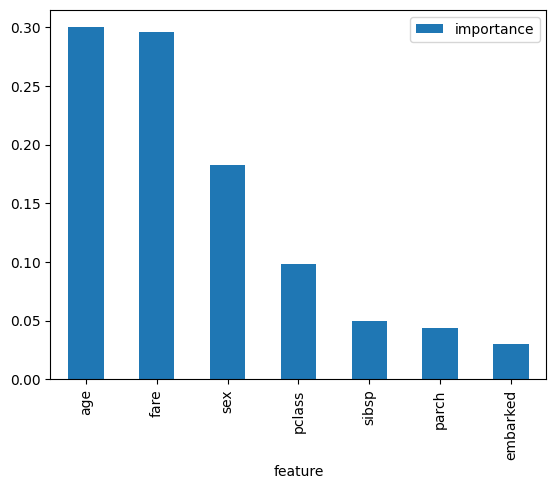

In [87]:
importances.plot.bar()

**Predicting the model**

In [55]:
pred = model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


**Model Deployment**

In [56]:
my_survival = [[3,1,21,0, 0, 0, 1]]
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You did not make it')
else:
  print('Nice! You survived')

[0]
Oh no! You did not make it
